/tmp/ipython-input-1210789326.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["satisfaction_score"].fillna(


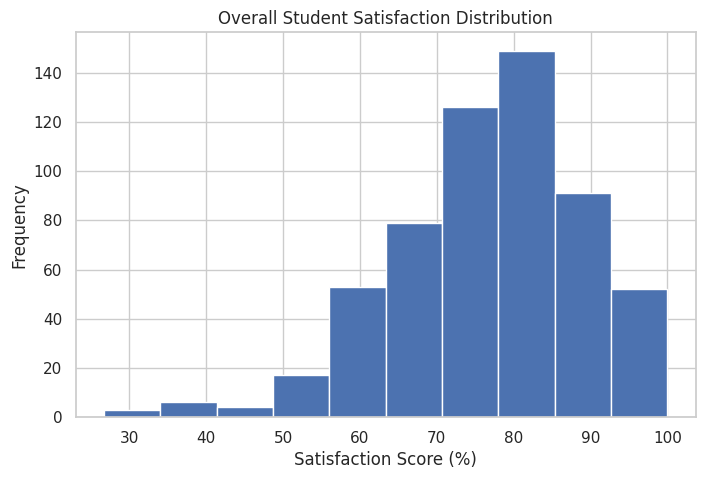

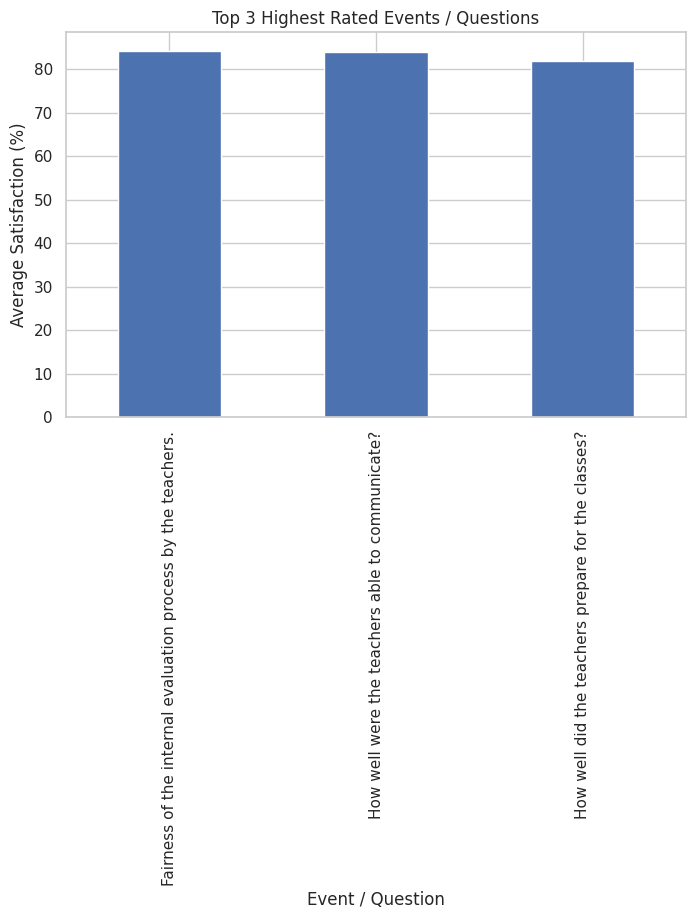

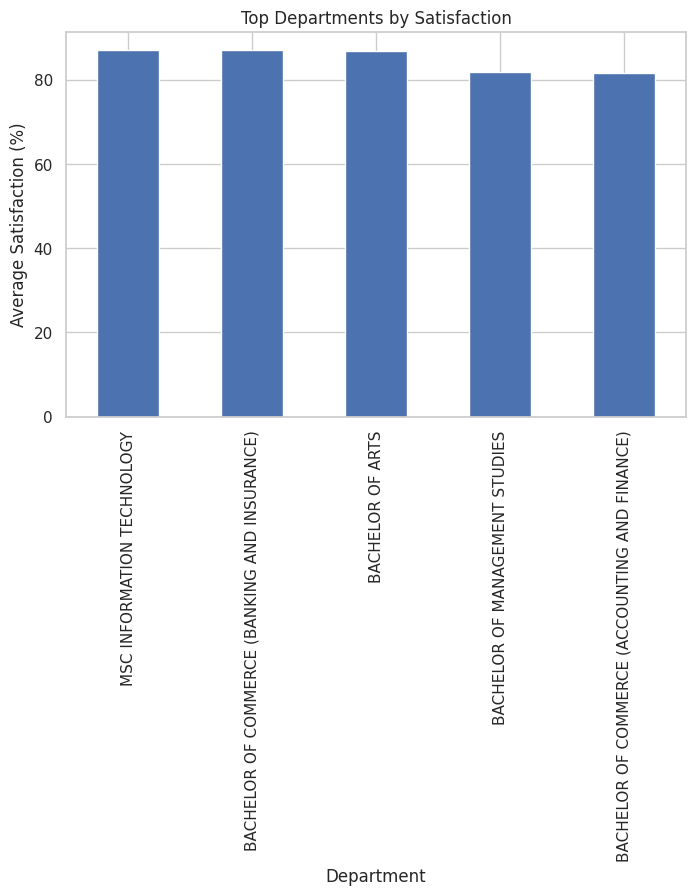

<Figure size 700x500 with 0 Axes>

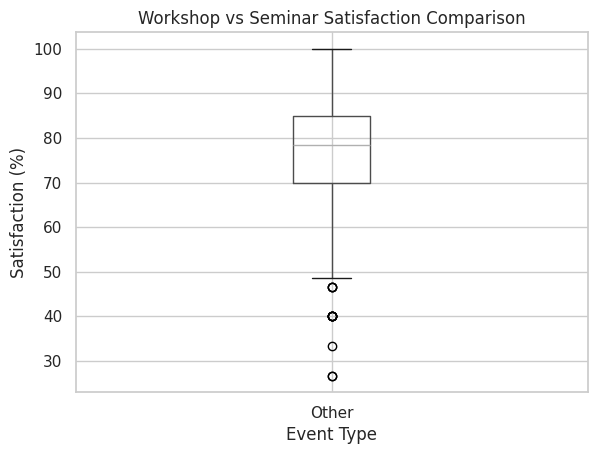

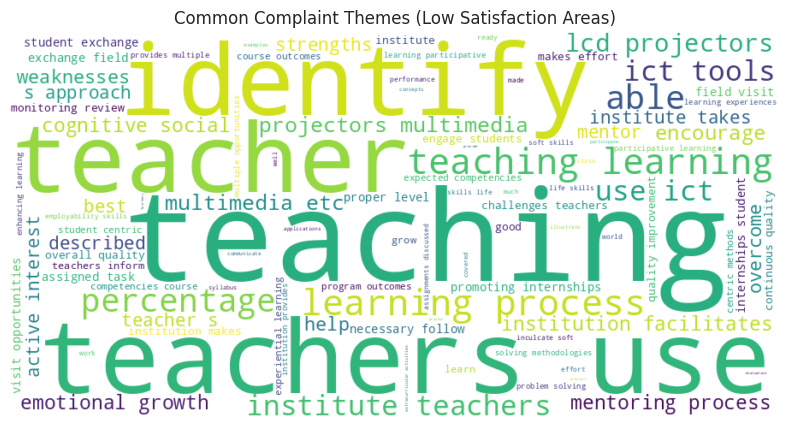

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re


# Load Dataset
df = pd.read_csv(
    "/content/student_survey_dataset.csv",
    encoding="latin1"
)

# Standardize column names
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)


# Column Identification
rating_col = "average__percentage"
event_col = "questions"
dept_col = "basic_course"

# Data Cleaning
def extract_numeric(value):
    match = re.search(r"(\d+\.?\d*)$", str(value))
    return float(match.group(1)) if match else np.nan

df["satisfaction_score"] = df[rating_col].apply(extract_numeric)

# Handle missing satisfaction scores
df["satisfaction_score"].fillna(
    df["satisfaction_score"].mean(),
    inplace=True
)


# Derive Event Type
def infer_event_type(text):
    text = str(text).lower()
    if "workshop" in text:
        return "Workshop"
    elif "seminar" in text or "talk" in text:
        return "Seminar"
    else:
        return "Other"

df["event_type"] = df[event_col].apply(infer_event_type)


# EXPLORATORY DATA ANALYSIS (EDA)


# Rating Distribution
plt.figure(figsize=(8, 5))
plt.hist(df["satisfaction_score"], bins=10)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Satisfaction Score (%)")
plt.ylabel("Frequency")
plt.show()


# Top 3 Highest Rated Events
top_events = (
    df.groupby(event_col)["satisfaction_score"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
)

plt.figure(figsize=(8, 5))
top_events.plot(kind="bar")
plt.title("Top 3 Highest Rated Events / Questions")
plt.xlabel("Event / Question")
plt.ylabel("Average Satisfaction (%)")
plt.show()

# Department-wise Satisfaction
dept_satisfaction = (
    df.groupby(dept_col)["satisfaction_score"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8, 5))
dept_satisfaction.plot(kind="bar")
plt.title("Top Departments by Satisfaction")
plt.xlabel("Department")
plt.ylabel("Average Satisfaction (%)")
plt.show()


# Workshop vs Seminar Comparison
plt.figure(figsize=(7, 5))
df.boxplot(
    column="satisfaction_score",
    by="event_type"
)
plt.title("Workshop vs Seminar Satisfaction Comparison")
plt.suptitle("")
plt.xlabel("Event Type")
plt.ylabel("Satisfaction (%)")
plt.show()


# NLP-INSPIRED COMPLAINT ANALYSIS


# Complaint Word Cloud

# Using bottom 25% satisfaction scores as complaint proxy
low_satisfaction = df[
    df["satisfaction_score"] <
    df["satisfaction_score"].quantile(0.25)
]

complaint_text = " ".join(
    low_satisfaction[event_col]
    .astype(str)
    .str.lower()
)

wordcloud = WordCloud(
    width=900,
    height=450,
    background_color="white",
    stopwords=STOPWORDS
).generate(complaint_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Complaint Themes (Low Satisfaction Areas)")
plt.show()

